<div style="text-align:center; cursor: auto;">
    <a href="https://www.credly.com/badges/5277e6b4-acf1-4f18-b83f-05d1d2ef3059/public_url" target="_blank">
        <img 
            src="applied-data-science-capstone.png" 
            width="150" 
            alt="IBM Applied Data Science Badge" 
            style="object-fit: cover; border-radius: 50%;">
    </a>
</div>

**<center><h2>Landing Prediction with Machine Learning</h2></center>**

In this section, we will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   Create a column for the class
*   Standardize the data
*   Split into training data and test data

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the best-performing method using the test data

## Import Libraries and Define Auxiliary Functions


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [69]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [70]:
secondDataset = "spacex_dataset_part_2.csv"

data = pd.read_csv(secondDataset)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [71]:
# import requests
# import io

# URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# resp2 = requests.get(URL2)
# text2 = io.BytesIO(resp2.content)
# X = pd.read_csv(text2)
# X.head(100)

thirdDataset = 'spacex_dataset_part_3.csv'
X = pd.read_csv(thirdDataset)
X.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### STEP 1: Create an Array from the Class in Data

In [72]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### STEP  2: Standardize our Data in X

Next, we have to standardize the data in <code>X</code>.


In [73]:
transform = preprocessing.StandardScaler()

X = transform.fit(X).transform(X)
X

array([[-1.71291154,  0.        , -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.67441914, -1.18972425, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.63592675, -1.15742336, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       ...,
       [ 1.63592675,  2.01380177,  3.49060516, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [ 1.67441914,  2.01380177,  1.00389436, ..., -0.21566555,
         5.38516481, -0.10599979],
       [ 1.71291154, -0.51905572, -0.65391284, ..., -0.21566555,
        -0.18569534,  9.43398113]])

### STEP  3: Split Data in X and Y into our Training and Test Data

The training data is divided into validation data, a second set used for training data, then the models are trained and hyperparameters are selected using the <code>GridSearchCV</code> function.

We will assign the following labels the training and test data:

<code>X_train, X_test, Y_train, Y_test</code>

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 2)
print('Train Set:', X_train.shape, Y_train.shape)
print('Test Set:', X_test.shape, Y_test.shape)

Train Set: (72, 80) (72,)
Test Set: (18, 80) (18,)


### STEP  4: Logistic Regression Classification


Besides crating a logistic regression object, we also need to 'fit' this object to find the best parameters.


In [75]:
parameters = {'C':[0.01,0.1,1],
             'penalty':['l2'], # l1 lasso l2 ridge
             'solver':['lbfgs']}

lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

logreg_cv

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

##### Best Parameters and Best Score Achieved:


In [76]:
print("tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("highest cross-validation score:", logreg_cv.best_score_)

tuned hyperparameters (best parameters):  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
highest cross-validation score: 0.8214285714285714


##### Accuracy on Test Data:


In [77]:
logreg_score = logreg_cv.score(X_test, Y_test)
logreg_score

0.8333333333333334

Lets look at the confusion matrix:


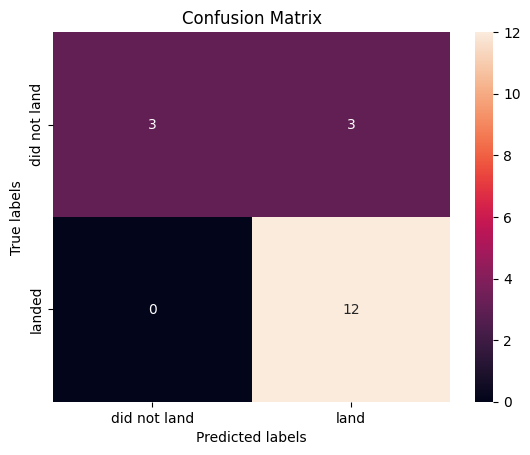

In [78]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


### STEP 5: Support Vector Machine (SVM) Classification

We will 'fit' the object to find the best parameters from the model.


In [79]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

##### Best Parameters and Best Score Achieved:

In [80]:
print("tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("highest cross-validation score:", svm_cv.best_score_)

tuned hyperparameters (best parameters):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
highest cross-validation score: 0.8482142857142858


##### Accuracy on Test Data:

In [81]:
svm_score = svm_cv.score(X_test, Y_test)
svm_score

0.8333333333333334

##### Confusion Matrix:


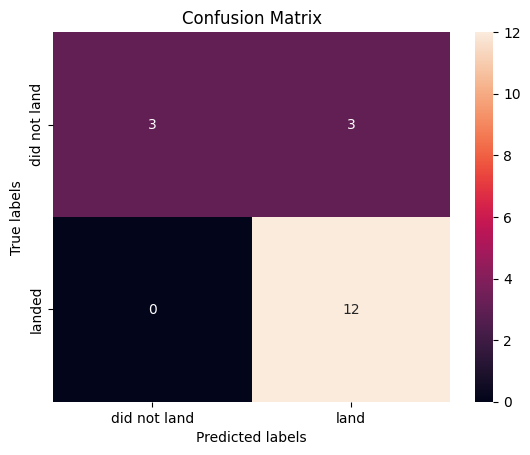

In [82]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### STEP 6: Decision Tree Classifier


We will fit such object to find its best parameters.


In [83]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     # 'max_features': ['auto', 'sqrt'],
     'max_features': ['sqrt', 'log2', None],  # 'auto' replaced with valid options
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

##### Best Parameters and Best Score Achieved:

In [84]:
print("tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)
print("highest cross-validation score:", tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
highest cross-validation score: 0.8857142857142858


##### Accuracy on Test Data:

In [85]:
tree_score = tree_cv.score(X_test, Y_test)
tree_score

0.8333333333333334

##### Confusion Matrix:


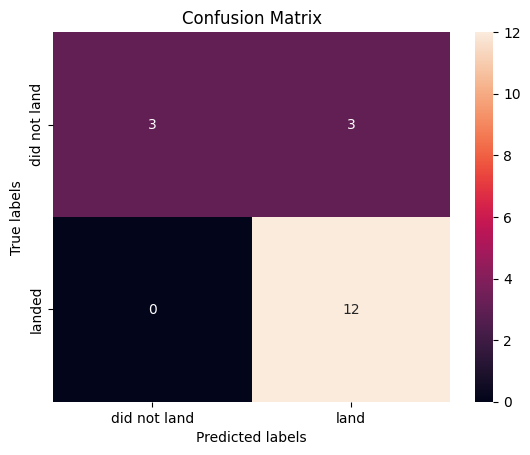

In [86]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### STEP 7: K-Nearest Neighbor Classifier

In [87]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [88]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


##### Accuracy on Test Data:


In [89]:
knn_score = knn_cv.score(X_test, Y_test)
knn_score

0.7777777777777778

##### Confusion Matrix:


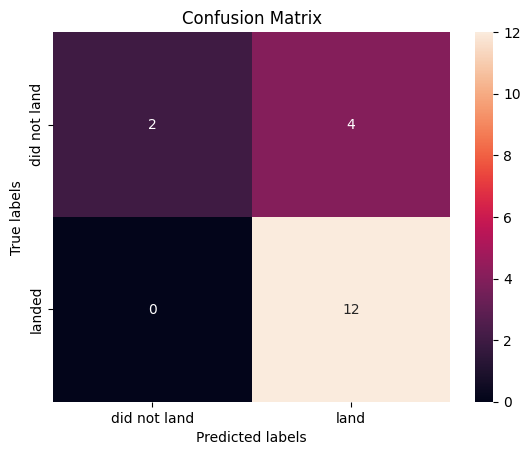

In [90]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### STEP 8: Finding the Best-Performing Method

In [91]:
scores = {'Logistic Regression': [logreg_cv.best_score_, logreg_score],
          'SVM': [svm_cv.best_score_, svm_score],
          'Decision Tree': [tree_cv.best_score_, tree_score],
          'KNN': [knn_cv.best_score_, knn_score]}

df_scores = pd.DataFrame.from_dict(scores, orient='index', columns=['Train Accuracy', 'Test Accuracy'])
df_scores

,Train Accuracy,Test Accuracy
Logistic Regression,0.821429,0.833333
SVM,0.848214,0.833333
Decision Tree,0.885714,0.833333
KNN,0.833929,0.777778


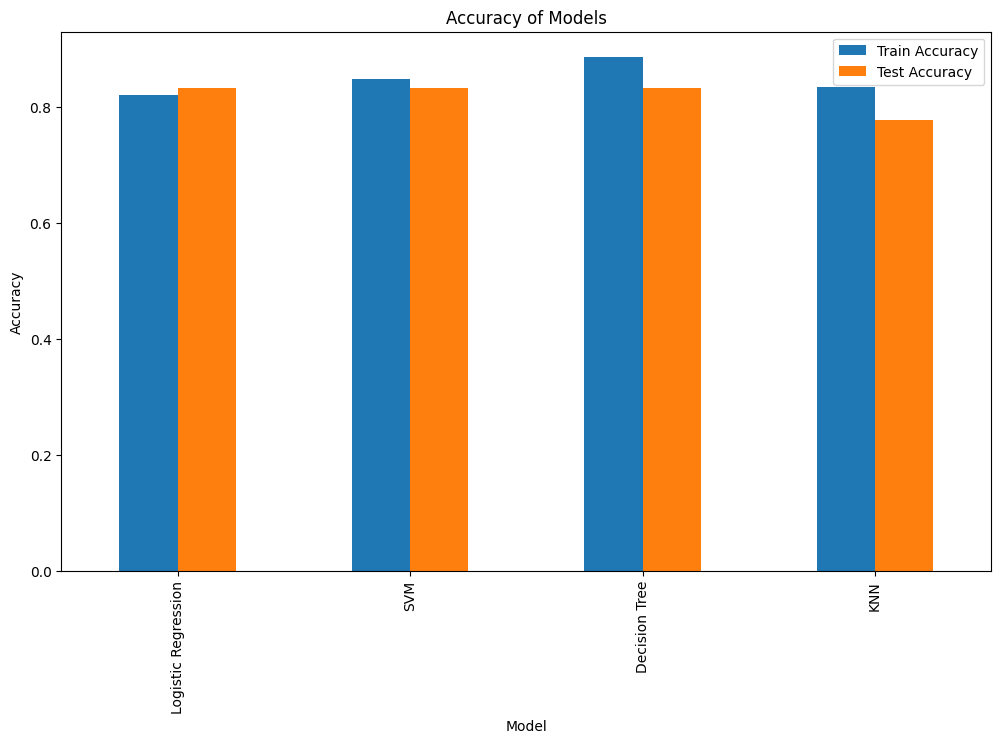

In [92]:
df_scores.plot(kind = 'bar', figsize = (12, 7))
plt.title('Accuracy of Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

### ANALYSIS:

- Logistic Regression or SVM are the best-performing models in this case, given their good generalization and equivalent test accuracy.

- Decision Tree has the same test accuracy but higher train accuracy, indicating potential overfitting.

- KNN underperforms due to its lower test accuracy.

Overfitting is, put simply, what happens when model performs well on the training data but poorly on test (unseen) data.